# DESARROLLO

## Importar librerias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import csv

## Crear base de datos

In [4]:
def createTable():
    conn=sqlite3.connect('mathStack.db')
    cursor=conn.cursor()

    cursor.execute('''CREATE TABLE IF NOT EXISTS data(
                    id INTEGER PRIMARY KEY,
                    Preguntas STRING NOT NULL,
                    Autores STRING NOT NULL,
                    Respuestas INTEGER NOT NULL,
                    Vistas INTEGER NOT NULL
    )''')

    conn.commit()
    conn.close()


## Leer csv

In [27]:
def leerCsv(csv_file):
    with open(csv_file, newline='',encoding='utf-8') as file:
        reader =csv.DictReader(file)
        data = [row for row in reader]
    return data


## Insertar datos en base de datos

In [28]:
def insertData(datos):
    conn = sqlite3.connect("../Desarrollo/mathStack.db")
    cursor = conn.cursor()

    for row in datos:
        cursor.execute("""
            INSERT INTO data (Preguntas, Autores, Respuestas, Vistas)
            VALUES (?, ?, ?, ?)
        """, (row["Preguntas"], row["Autores"], int(row["Respuestas"]), int(row["Vistas"])))

    conn.commit()
    conn.close()


## Ejecutar funciones

In [35]:
if __name__ == "__main__":
    createTable()

if __name__ == "__main__":
    data_to_insert = leerCsv("../Datos/Datos_2023-08-08.csv")
    insertData(data_to_insert)


## Limpiar datos con pandas

### Unir todos los csv en uno solo

In [8]:
import os
import pandas as pd

folder_path = '../Datos'

dataframes = []

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

merged_df = pd.concat(dataframes, ignore_index=True)

merged_df.to_csv('dataFrames.csv', index=False)

print("Archivos CSV unidos exitosamente.")

Archivos CSV unidos exitosamente.


## Limpiar datos (eliminar registros los cuales tengan 0 respuestas)

In [9]:
df=pd.read_csv("dataFrames.csv")

df = df[df["Respuestas"] != 0]

df

,Preguntas,Autores,Respuestas,Vistas
40,Sum of values across a line?,calculus,2,4
57,Reference Request for Schatten Class Operators...,ZeroTheHero,2,2
59,What does the conjunction symbol ∧ mean with r...,terminology,2,4
62,Comparing Equating $\frac{dy}{dx}$ with Lagran...,monomorphisms,2,3
77,Proving that $\frac{\sin(t\theta)}{\sin(\theta...,geocalc33,2,6
109,Projective module base change,functions,2,1
154,The ship is made of holes: what happens to the...,connections,2,4
171,"Calculating $\mathbb E[X|X^2+Y^2]$ with $X,Y\o...",group-theory,2,2
173,Block matrices rank inequality,symmetric-groups,2,2
176,Who proved that $\pi(n) < 1.25506\frac{n}{ln(n...,Emanuel Dias,2,6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 40 to 743
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Preguntas   47 non-null     object
 1   Autores     47 non-null     object
 2   Respuestas  47 non-null     int64 
 3   Vistas      47 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.8+ KB


In [18]:
df.to_csv("/Users/carlo/OneDrive/Escritorio/WebScraping_Maths.StackExchange/ScriptLimpio.csv", index=False)

## 3. Datos obtenidos graficados

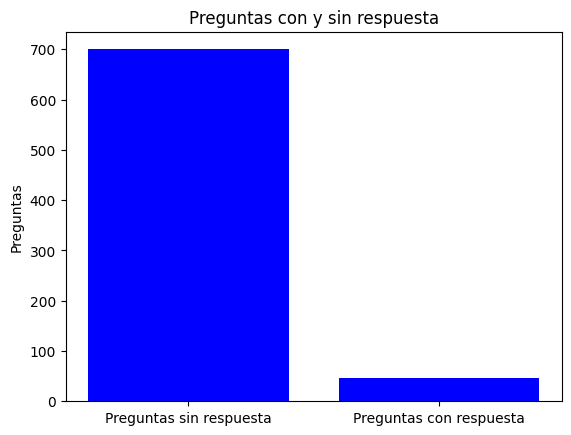

In [15]:
x=np.array(["Preguntas sin respuesta","Preguntas con respuesta"])
y=np.array([700,47])

plt.title("Preguntas con y sin respuesta")
plt.ylabel("Preguntas")
plt.bar(x,y,color="blue")
plt.savefig("Relacion.jpg")
plt.show()

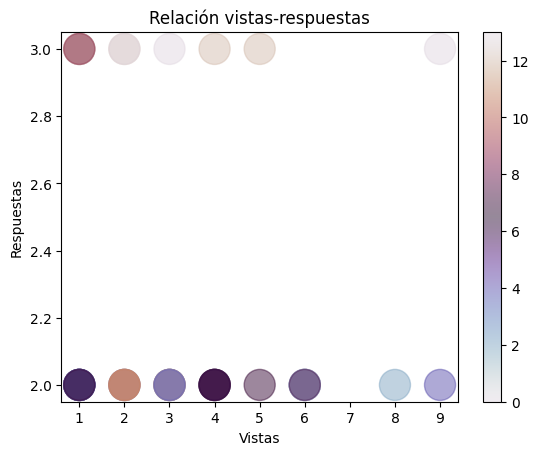

In [17]:
x=np.array(df["Vistas"].values)
y=np.array(df["Respuestas"].values)
color=np.random.randint(15, size=(47))
size=500

plt.scatter(x,y,c=color, s=size, alpha=0.5, cmap='twilight')
plt.colorbar()

plt.title("Relación vistas-respuestas")
plt.ylabel("Respuestas")
plt.xlabel("Vistas")
plt.savefig("Relacion_Vistas.jpg")
plt.show()


## Crear base de datos con solo los valores no nulos

In [23]:
def createAnotherTable():
    conn=sqlite3.connect('mathStackClean.db')
    cursor=conn.cursor()

    cursor.execute('''CREATE TABLE IF NOT EXISTS data(
                    id INTEGER PRIMARY KEY,
                    Preguntas STRING NOT NULL,
                    Autores STRING NOT NULL,
                    Respuestas INTEGER NOT NULL,
                    Vistas INTEGER NOT NULL
    )''')

    conn.commit()
    conn.close()

def leerCsv(csv_file):
    with open(csv_file, newline='',encoding='utf-8') as file:
        reader =csv.DictReader(file)
        data = [row for row in reader]
    return data

def insertData(datos):
    conn = sqlite3.connect("../Desarrollo/mathStackClean.db")
    cursor = conn.cursor()

    for row in datos:
        cursor.execute("""
            INSERT INTO data (Preguntas, Autores, Respuestas, Vistas)
            VALUES (?, ?, ?, ?)
        """, (row["Preguntas"], row["Autores"], int(row["Respuestas"]), int(row["Vistas"])))

    conn.commit()
    conn.close()

if __name__ == "__main__":
    createAnotherTable()

if __name__ == "__main__":
    data_to_insert = leerCsv("/Users/carlo/OneDrive/Escritorio/WebScraping_Maths.StackExchange/ScriptLimpio.csv")
    insertData(data_to_insert)